In [42]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import copy
plt.style.use('seaborn-poster')
%matplotlib notebook

In [65]:
def delete_elem(np_arr, n):
    return np.concatenate((np_arr[:n], np_arr[n+1:n+39], np_arr[n+40:]))

In [2]:
# read data:
pca = np.load('PCA_points.npy')
mds = np.load('MDS_points.npy')
umap = np.load('UMAP_points.npy')

# extracting label data
with open('labels.txt') as f:
    labels = f.readlines()
for i in range(len(labels)):
    labels[i] = labels[i][:-1]
print(len(labels))
print(labels)

282
['TCGA-02-0060_prediction', 'TCGA-06-0166_prediction', 'TCGA-06-0168_prediction', 'TCGA-06-0189_prediction', 'TCGA-06-0241_prediction', 'TCGA-06-0649_prediction', 'TCGA-08-0352_prediction', 'TCGA-08-0353_prediction', 'TCGA-08-0354_prediction', 'TCGA-08-0357_prediction', 'TCGA-08-0358_prediction', 'TCGA-08-0510_prediction', 'TCGA-08-0521_prediction', 'TCGA-08-0524_prediction', 'TCGA-08-0529_prediction', 'TCGA-12-1093_prediction', 'TCGA-12-1602_prediction', 'TCGA-CS-4941_prediction', 'TCGA-CS-4943_prediction', 'TCGA-CS-5395_prediction', 'TCGA-CS-6290_prediction', 'TCGA-DU-5849_prediction', 'TCGA-DU-5852_prediction', 'TCGA-DU-6400_prediction', 'TCGA-DU-6407_prediction', 'TCGA-DU-6408_prediction', 'TCGA-DU-6410_prediction', 'TCGA-DU-A5TP_prediction', 'TCGA-DU-A6S6_prediction', 'TCGA-FG-A6IZ_prediction', 'TCGA-HT-7616_prediction', 'TCGA-HT-7856_prediction', 'TCGA-HT-7874_prediction', 'TCGA-HT-7882_prediction', 'TCGA-HT-8105_prediction', 'TCGA-HT-8106_prediction', 'TCGA-HT-8107_predictio

In [66]:
print(mds[5])
print(mds[39+5])
print(delete_elem(mds, 5))

[ 144.83435639 -135.21636695 -181.38138292]
[ 155.71979364 -126.04736279 -207.18169801]
[[ 4.35837706e+00 -2.04344471e+01 -1.42667583e-01]
 [-2.35217639e+02 -1.44993171e+02 -8.47052971e+01]
 [-2.93146698e+01 -2.18701672e+01  4.89285848e+01]
 [-1.82884198e+02 -1.69732183e+01  1.13973337e+02]
 [ 3.38405233e+01 -8.31575755e+01 -3.35043761e+00]
 [-3.09331145e+02 -4.34854190e+00  6.06965567e+01]
 [ 1.45379504e+02 -1.55567155e+02 -9.39676900e+01]
 [ 4.81127257e+01  4.93944667e+01 -8.08340495e+01]
 [ 3.27296353e+01 -1.44870489e+02  7.27405011e+01]
 [-1.15323481e+02  5.36198770e-01 -1.44541000e+02]
 [ 3.88317450e+01  8.20328376e+01 -1.79239248e+02]
 [ 1.38128981e+02 -3.03250310e+01  1.66085042e+02]
 [-2.28555994e+02 -8.90337910e+01 -2.58906454e+01]
 [ 8.07416999e+01  8.20939791e+01  1.32741637e+02]
 [ 1.27005358e+02 -2.62345680e+01  9.22701654e+01]
 [ 4.99853709e+01 -1.34597465e+02 -6.02017834e+01]
 [ 3.06036060e+01  1.51544164e+02  9.02929056e+01]
 [ 1.80275826e+02  5.57612827e+01  6.31617793

<IPython.core.display.Javascript object>


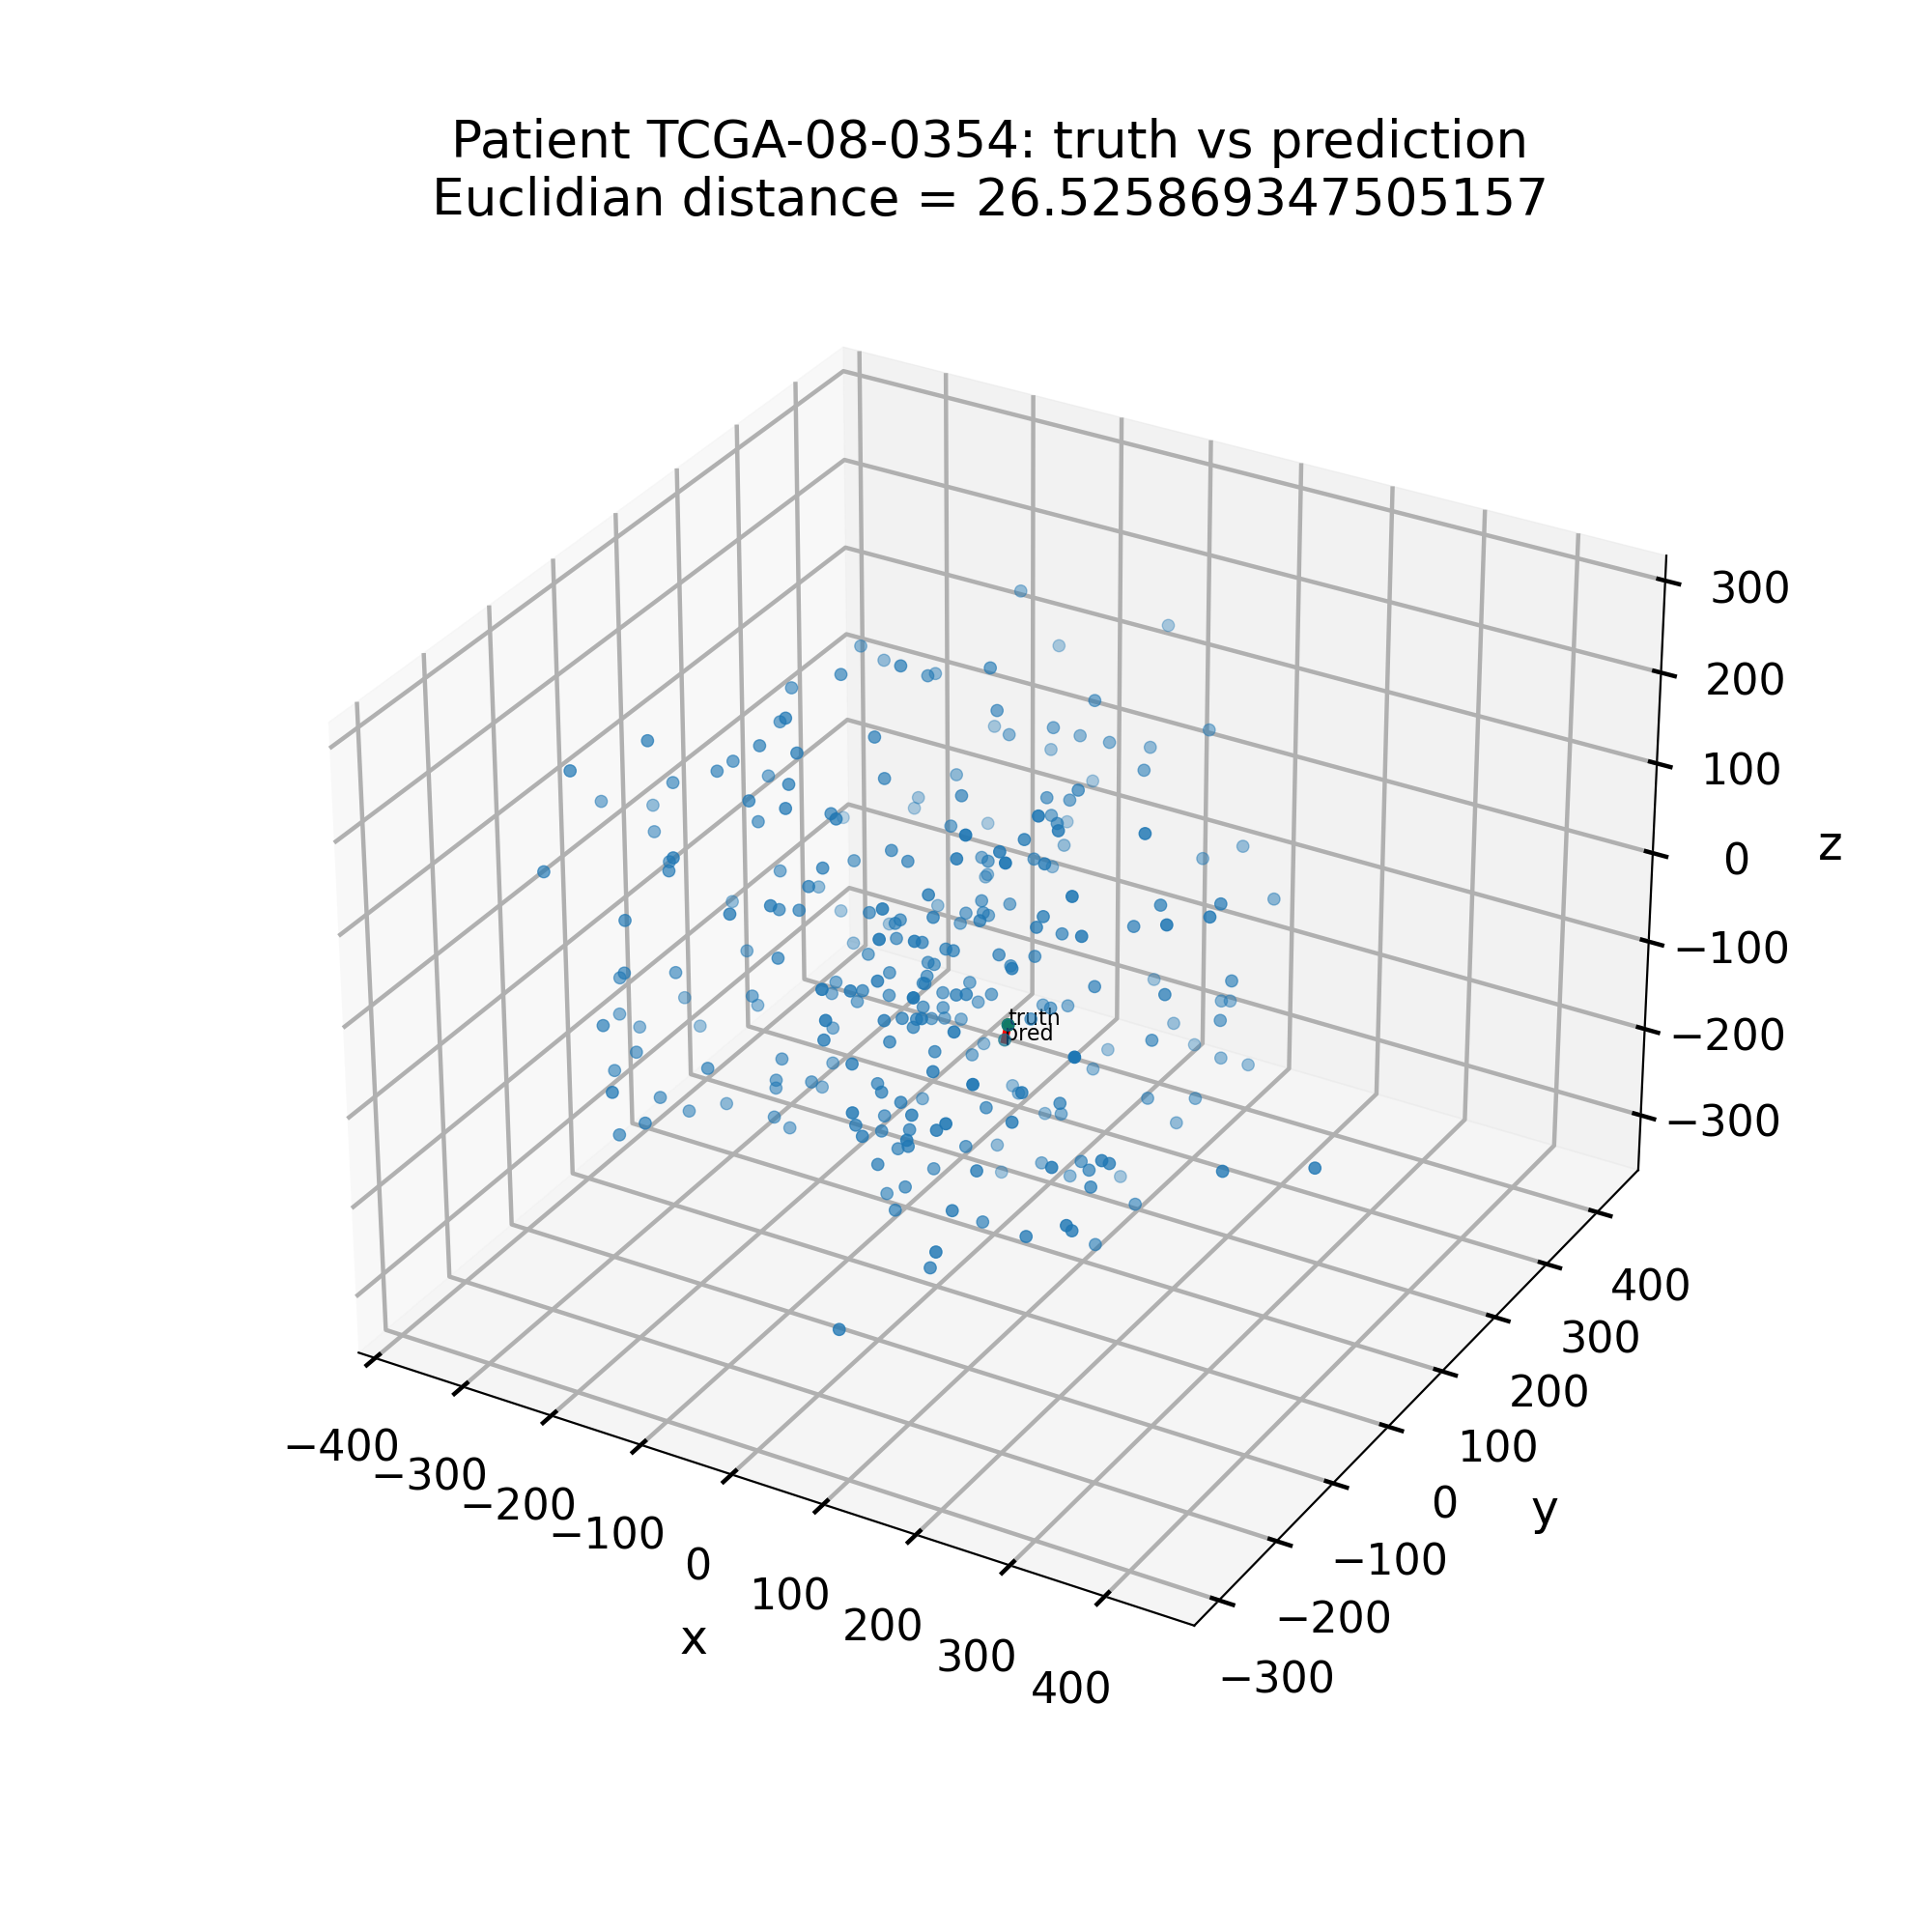

In [83]:
#Plotting the figure for MDS

n = 8  # any number between 0 and 38

truth = mds[n]
pred = mds[n + 39]

dist = np.linalg.norm(truth - pred)

mds_copy = delete_elem(mds, 5)

x = mds_copy[:, 0]
y = mds_copy[:, 1]
z = mds_copy[:, 2]

fig = plt.figure(figsize = (1,10))
ax = plt.axes(projection='3d')

ax.set_title(f'Patient {labels[n][:-11]}: truth vs prediction\nEuclidian distance = {dist}')

ax.scatter(x, y, z)
ax.plot3D(np.array([truth[0], pred[0]]), np.array([truth[1], pred[1]]), np.array([truth[2], pred[2]]), color = 'red')
ax.scatter(np.array([truth[0], pred[0]]), np.array([truth[1], pred[1]]), np.array([truth[2], pred[2]]), color = 'green')
    
ax.text(truth[0], truth[1], truth[2], 'truth', size=8)
ax.text(pred[0], pred[1], pred[2], 'pred', size=8)


ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()

Text(0.5, 0, 'PC3')

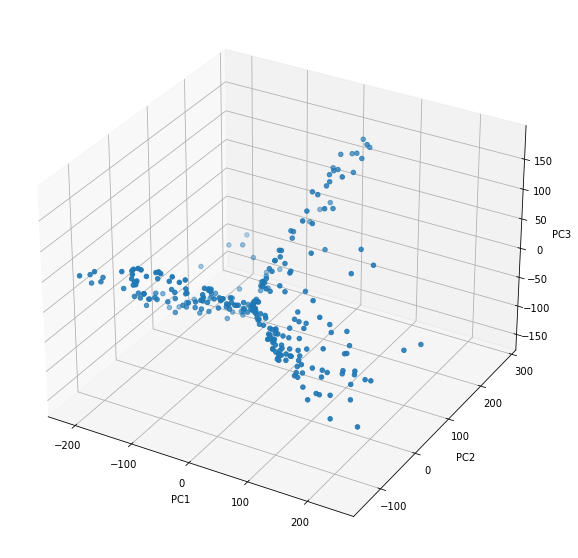

In [4]:
fig = plt.figure(figsize=(10, 10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(pca[:,0], pca[:,1], pca[:,2])
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

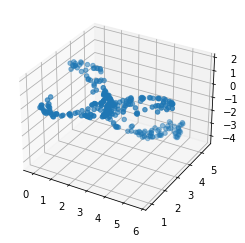

In [5]:
#Plotting the images for UMAP

xs = umap[:, 0]

ys = umap[:, 1]

zs = umap[:, 2]

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs,ys,zs)

plt.show()